In [1]:
from  truthfinder import *
import json
from jupyterthemes import jtplot
jtplot.style()

veritas_modelpath='../../veritas_models/veritas_ptsd.pkl.gz'

In [2]:
DIAGNOSIS_THRESHOLD

1.35

In [3]:
def getPTSDid(n):
    idmap=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,121,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211])
    return 'ptsd'+str(idmap[n])


In [4]:
import pandas as pd
resp=pd.read_csv('../data/processed_cat.csv',
            names=['subid','qid','catid','resp'])

In [5]:
resp['PTSDid'] = [getPTSDid(x-1) for x in resp.catid.values]

In [6]:
catindex=np.array(list(set(resp.PTSDid.values)))
np.savetxt('catindex.txt',catindex,fmt='%s')

In [7]:
def getDIct(df):
    # Process the DataFrame to create a nested dictionary as described: {'1': {'PTSD156': 3, 'PTSD147': 3, ...}}
    processed_data = {}

    for index, row in df.iterrows():
        subject_id = str(row['subid'])  # Assuming 'qid' is the subject ID.
        PTSDid = row['PTSDid']
        resp = row['resp']

        if subject_id not in processed_data:
            processed_data[subject_id] = {}

        processed_data[subject_id][PTSDid] = resp
    return processed_data

In [8]:
respjson15=[getDIct(resp[resp.subid==i]) for i in np.arange(1,714) if resp[resp.subid==i].index.size > 15]
respjson=[getDIct(resp[resp.subid==i]) for i in np.arange(1,714)]

ckeck passed


array([[<AxesSubplot:title={'center':'veritas'}>,
        <AxesSubplot:title={'center':'upper'}>],
       [<AxesSubplot:title={'center':'lower'}>, <AxesSubplot:>]],
      dtype=object)

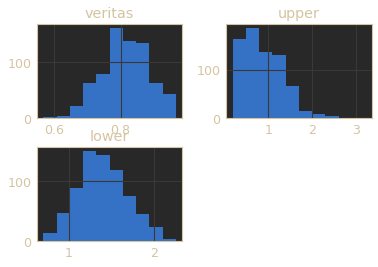

In [18]:
Rs=reveal(respjson,veritas_modelpath)
r_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in Rs[0]]
r=pd.DataFrame(r_,columns=['veritas','upper','lower'])
r.hist()

In [17]:
r#[r>1.245]

,veritas,upper,lower
0,0.766667,1.248321,1.296300
1,0.800000,0.799385,1.354138
2,0.866667,1.098912,1.820996
3,0.933333,0.631032,1.409223
4,0.957123,0.539697,2.417792
...,...,...,...
708,0.850000,0.725496,1.657372
709,0.833333,1.834566,0.940032
710,0.950000,0.380633,1.975486
711,0.824992,0.762877,1.911551


In [14]:
len(respjson)

713

In [15]:
respjson[712]

{'713': {'ptsd156': 1,
  'ptsd210': 1,
  'ptsd152': 1,
  'ptsd189': 1,
  'ptsd155': 1,
  'ptsd25': 1,
  'ptsd146': 1,
  'ptsd147': 1,
  'ptsd48': 1,
  'ptsd207': 1,
  'ptsd188': 1,
  'ptsd150': 1,
  'ptsd37': 1,
  'ptsd84': 1,
  'ptsd151': 1,
  'ptsd16': 1,
  'ptsd184': 1,
  'ptsd77': 1,
  'ptsd89': 1,
  'ptsd81': 1,
  'ptsd195': 1,
  'ptsd173': 1}}

In [16]:
reveal([respjson[712]],veritas_modelpath)

ckeck passed


([{'subject_id': '713',
   'responses': {'ptsd156': '1',
    'ptsd210': '1',
    'ptsd152': '1',
    'ptsd189': '1',
    'ptsd155': '1',
    'ptsd25': '1',
    'ptsd146': '1',
    'ptsd147': '1',
    'ptsd48': '1',
    'ptsd207': '1',
    'ptsd188': '1',
    'ptsd150': '1',
    'ptsd37': '1',
    'ptsd84': '1',
    'ptsd151': '1',
    'ptsd16': '1',
    'ptsd184': '1',
    'ptsd77': '1',
    'ptsd89': '1',
    'ptsd81': '1',
    'ptsd195': '1',
    'ptsd173': '1'},
   'veritas': 0.8666666666666667,
   'veritas_prob': 0.9978175324268892,
   'score': 0.3406611117597447,
   'lower_threshold': 1.5542711967601646}],
 ['No PTSD indicated. Malingering test unnecessary'])

ckeck passed


array([[<AxesSubplot:title={'center':'veritas'}>,
        <AxesSubplot:title={'center':'upper'}>],
       [<AxesSubplot:title={'center':'lower'}>, <AxesSubplot:>]],
      dtype=object)

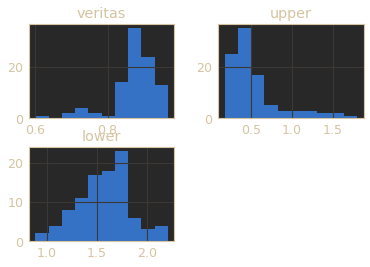

In [19]:
Rs15=reveal(respjson15,veritas_modelpath)
r15_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in Rs15[0]]
r15=pd.DataFrame(r15_,columns=['veritas','upper','lower'])
r15.hist()

In [22]:
r15[r15.upper<1.245]

,veritas,upper,lower
0,0.900000,0.332980,1.626566
1,0.900000,1.101811,1.122658
3,0.952381,0.267430,2.104426
4,0.959853,0.242684,1.831524
5,0.900000,0.522524,1.780190
...,...,...,...
91,0.833333,0.994009,1.434346
92,0.900000,0.403821,1.214477
93,0.910581,0.371037,1.710925
94,0.777778,0.238443,1.710605


In [23]:
r15[r15.upper>1.245]

,veritas,upper,lower
2,0.700000,1.380465,1.083402
20,0.733333,1.379716,1.159107
21,0.600000,1.797375,0.883229
29,0.743758,1.596197,1.101566
30,0.733333,1.539804,1.148937
40,0.866667,1.274734,1.154279


In [24]:
respjson15[2]

{'33': {'ptsd156': 3,
  'ptsd148': 3,
  'ptsd160': 5,
  'ptsd190': 2,
  'ptsd147': 3,
  'ptsd189': 3,
  'ptsd153': 4,
  'ptsd155': 3,
  'ptsd18': 5,
  'ptsd146': 3,
  'ptsd211': 4,
  'ptsd152': 4,
  'ptsd145': 3,
  'ptsd207': 4,
  'ptsd25': 4,
  'ptsd169': 3,
  'ptsd159': 3,
  'ptsd180': 3}}

In [47]:
RESULT={}
RESULT['nodx']=r[r.upper<1.245].index.size
RESULT['dx']=r.index.size-RESULT['nodx']
RESULT['malingering1'] = r[(r.upper>1.245) & (r.veritas>.81)].index.size
RESULT['malingering2'] = r[(r.lower<.9) & (r.upper>1.245)].index.size
RESULT['malingering_total'] = RESULT['malingering1']+RESULT['malingering2']

RESULT

{'nodx': 570,
 'dx': 143,
 'malingering1': 22,
 'malingering2': 20,
 'malingering_total': 42}

In [36]:
56/204

0.27450980392156865

In [45]:
143/(713)


0.2005610098176718

In [46]:
42/147

0.2857142857142857